## Open the data file and have a look at the general information

In [200]:
# necessary libraries
import pandas as pd                    #data processing
import matplotlib.pyplot as plt        #plotting
import seaborn as sns                  #plotting
%matplotlib inline

import scipy.stats as st               #statistical analysis

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [201]:
# load the data and get familiarized with it
try:
    games = pd.read_csv('/datasets/games.csv')
    display(games.head())
    games.info()
except:
    print('Something went wrong! Check the correctness of the file path!')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Conclusion
All necessary Python packages and dataset has been successfully loaded. Data has **11 columns** and **16715 rows**. Issue identified so far:
- Column names have letters in upper and lowercase. All should be made lowercase;
- We already observed several missing values. They should be checked and dealt with;
- User_score columns has "object" data type, we need to check it and convert it to "float";
- Data type of year_of_release column should also be changed to datetime!

## Prepare the data
- Replace the column names (make them lowercase).
- If necessary, decide how to deal with missing values:
    - Explain why you filled in the missing values as you did or why you decided to leave them blank.
    - Why do you think the values are missing? Give possible reasons.
    - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Convert the data to the required types.
    - Describe the columns where the data types have been changed and why.

- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

### Column names

In [202]:
# convert columns names to lowercase
games.columns = games.columns.str.lower()

# check the results
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


### Missing values

In [203]:
# check for percentage missing values in each column
games.isnull().sum()*100/len(games)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

> **6 columns** out of 11 have missing values. As described at the beginning of the project, this data was obtained from open sources. Therefore, the most likely reason for missing values is that they were left blank during filling the table. This might be due to that the values were not released (e.g. ESRB rating, user/critic scores) or the person who filled the table could not reach the information (release year etc) at the time of filling the table. We will deal with them as follows:
- Both **name and genre** columns have a similar number of missing values and they are only in 2 rows. We can drop these two rows.
- Similarly, the **year_of_release** column has also missing values, which is only 1.6%. We will drop them as well!
- The **critic_score and user_score** columns have a lot of missing values (51% and 40% respectively). Actually, we will fill them, for example with median values of each genre. But in that case, our results will be biased. Since we are not going to use machine learning algorithms in this project. Let's leave them as is, in order to avoid any bias!
- The **rating** column also has a lot of missing values. We will fill them as "unknown".

In [204]:
#drop rows which has missing values in name, genre and year_of_release columns
games = games[games['name'].notna()]
games = games[games['year_of_release'].notna()]

#check the results
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [205]:
# check rating symbols and find out their meanings
games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

> Meanig of each symbol in the rating columns
- E: Everyone
- M: Mature (>= 17)
- T: Teen (>= 13)
- E10+: Everyone (>=10)
- K-A: kids to adults (renamed to E in 1998)
- AO: Adults only (>=18)
- EC: Early childhood
- RP: rating pending

In [206]:
# fill missing values of rating columns with the "unknown" phrase
games.loc[pd.isna(games['rating']), 'rating'] = 'unknown'

#check the result
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

### Data types

In [207]:
#change data type of year_of_release column
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y', errors='coerce').dt.year

#check the result
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown


> There are "tbd" values in the **user_score** column. We don't know these values. Therefore we will treat them as missing values.

In [208]:
#change the tbd values with the NaN
games.loc[games['user_score'].isin(['tbd']),'user_score'] = float('NaN')

#change data type from "object" to "float"
games['user_score'] = games['user_score'].astype('float64')

### Total sales
Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [209]:
# add na_sales, eu_sales, jp_sales and other_sales columns to get the total_sales column
games['total_sales'] = games[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#check the result
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24


### Conclusion
All column names were converted to lowercase to easily deal them in future. There were missing values in **name, genre, year_of_release, critic_score, user_score and rating** columns. The most likely reason for missing values is that they were left blank during filling the table. This might be due to that the values were not released (e.g. ESRB rating, user/critic scores) or the person who filled the table could not reach the information (release year etc) at the time of filling the table. We  have dealt with them as follows:
- Both **name and genre** columns have a similar number of missing values and they are only in 2 rows. We can drop these two rows.
- Similarly, the **year_of_release** column has also missing values, which is only 1.6%. We will drop them as well!
- The **critic_score and user_score** columns have a lot of missing values (51% and 40% respectively). Actually, we will fill them, for example with median values of each genre. But in that case, our results will be biased. Since we are not going to use machine learning algorithms in this project. Let's leave them as is, in order to avoid any bias!
- The **rating** column also has a lot of missing values. We will fill them as "unknown".

The data types of **year_of_release and user_score** columns were changed (float->datetime and object-> float, respectively). However, it was observed that the **user_score** column was containing "tbd" values. Since we don't know these values, they were treated as missing values, i.e. "tbd" converted to "NaN".

A new column containing information about global sales is created by adding **na_sales, eu_sales, jp_sales and other_sales** columns. This column was named "total_sales".

## Analyze the data
- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

### Release of games by years
Look at how many games were released in different years. Is the data for every period significant?

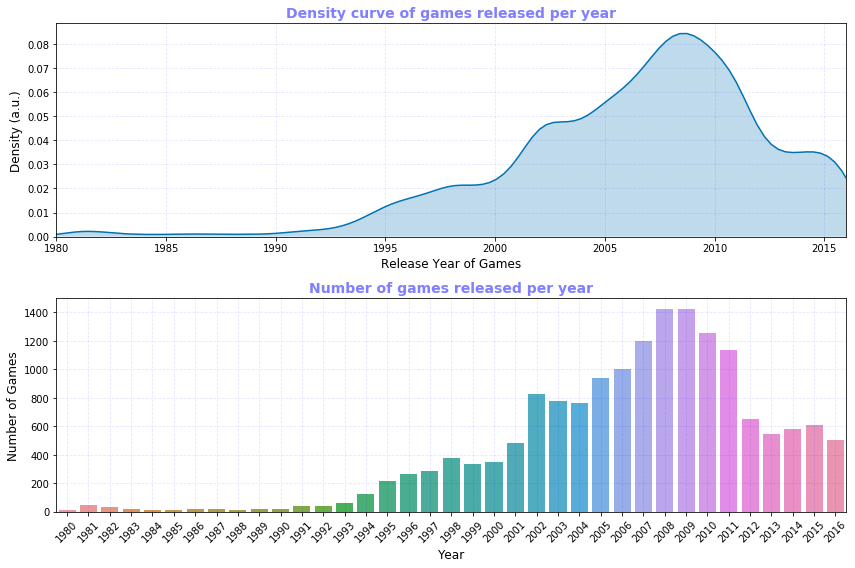

In [210]:
# create fig and ax objects
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# number of games that were released each year (density curve)
sns.distplot(games['year_of_release'], hist=False, kde_kws={'shade':True}, ax=ax[0])
ax[0].grid(b=True, which='major', color='b', linestyle='--', alpha=0.1)
ax[0].set_xlabel('Release Year of Games', fontsize=12)
ax[0].set_ylabel('Density (a.u.)', fontsize=12)
ax[0].set_xlim(1980, 2016)
ax[0].set_title('Density curve of games released per year', fontsize=14, weight='bold', color='b', alpha=0.5)

# a number of games that were released each year (countplot)
sns.countplot(games['year_of_release'].sort_values(), ax=ax[1])
plt.xticks(rotation=45)
ax[1].grid(b=True, which='major', color='b', linestyle='--', alpha=0.1)
ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_ylabel('Number of Games', fontsize=12)
ax[1].set_title('Number of games released per year', fontsize=14, weight='bold', color='b', alpha=0.5)

#show plots
plt.tight_layout()
plt.show()

> Very few games were released before 1990. It is logical right?! At that times technology (i.e. computers) was not developed yet. But then the number of games exponentially increased until 2008-2009 with the development of technology. At this peak times, around 1400 games were released yearly. Then the number of games decreased somehow and stabilized to ~600 games per year in 2012.

### Sales by Platform
Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [211]:
#which different platforms are available in our data
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

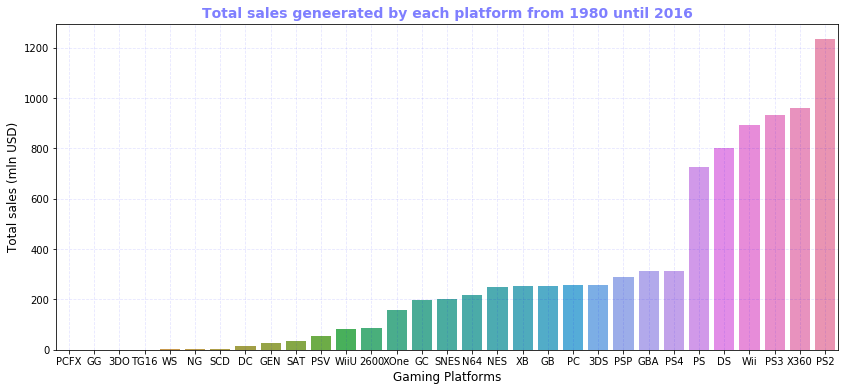

In [212]:
# group data by platforms and adding total sales
platform_total_sales = games.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales')

#creat a figure object and plot a bar chart for total sales of each platform
plt.figure(figsize=(14, 6))
sns.barplot(data=platform_total_sales, x='platform', y='total_sales')
plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.1)
plt.xlabel('Gaming Platforms', fontsize=12)
plt.ylabel('Total sales (mln USD)', fontsize=12)
plt.title('Total sales geneerated by each platform from 1980 until 2016', fontsize=14, weight='bold', color='b', alpha=0.5)
#show the plot
plt.show()

In [213]:
# platforms with highest sales of all times: PS, DS, Wii, PS3, X360, PS2
# take only top platforms and add their sales on each year
top_platform_sales = games[games['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]\
                       .groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
#check the result
top_platform_sales.sample(3)

,platform,year_of_release,total_sales
5,DS,2008,145.31
34,PS3,2007,73.19
31,PS2,2010,5.64


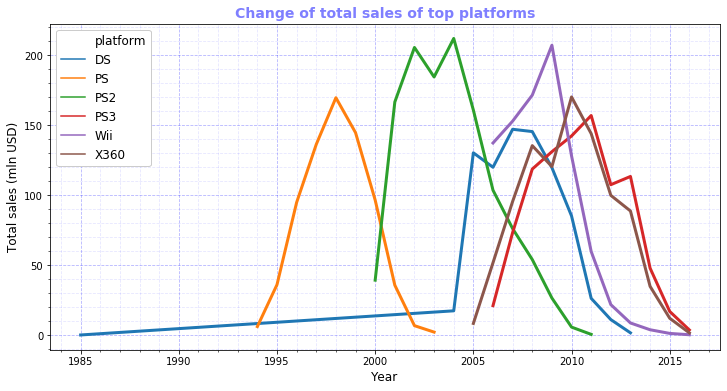

In [214]:
#create a figure obejct
plt.figure(figsize=(12, 6))

#plot a line plot showing yearly revenue of top platforms
sns.lineplot(data=top_platform_sales, x='year_of_release', \
             y='total_sales', hue='platform', palette='tab10', linewidth=3)

#add major and minor grid lines
plt.grid(b=True, which='major', color='b', linestyle='--', alpha=0.3)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='b', linestyle='--', alpha=0.1)

#titles and labels
plt.title('Change of total sales of top platforms', fontsize=14, weight='bold', color='b', alpha=0.5)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total sales (mln USD)', fontsize=12)
plt.legend(loc='upper left', frameon=True, framealpha=1, fontsize=12)

#show the plot
plt.show()

> Total sales for each platform differentiate significantly. Some platforms have only very few sales. However, some platforms made more than 700 mln USD in sales until 2016, such as PS, DS, Wii, PS3, X360 and PS2. We have chosen those platforms and analyzed in how many years they obtained such an amount of money. In general, it takes around 5 years for a new platform to shine, and again 5 years it takes to fade out. However, Nintendo DS is an exception for this.

### Years for forecast
Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

In [215]:
# get data for year_of_release between 2011-2016
games_recent=games.query('2011 < year_of_release').reset_index(drop=True)
display(games_recent.head(2))
games_recent.shape

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


(2886, 12)

> From previous tasks, we have observed that the number of the game published got stabilized after 2011. Therefore, we are going to get games that were released after 2011.

### Growing/Shrinking platforms
Which platforms are leading in sales in recent years? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [216]:
# make a pivot table with year_of_release as index and platforms as columns. Add total_sales
# some platforms did not get a new release in particular years, fill them with 0
pivot=games_recent.pivot_table(index='year_of_release', columns='platform', values='total_sales', \
                               aggfunc='sum').fillna(0)
#check the result
pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


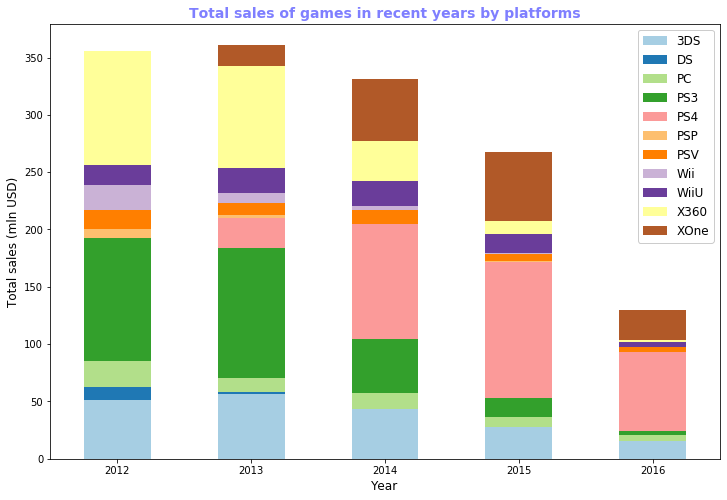

In [217]:
# a bar chart showing total sales made each year and each bar is broken down by platforms
pivot.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Paired')

#customize the plot
plt.title('Total sales of games in recent years by platforms', fontsize=14, weight='bold', color='b', alpha=0.5)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Total sales (mln USD)', fontsize=12)
plt.legend(loc='upper right', frameon=True, framealpha=1, fontsize=12)

#show the plot
plt.show()

> In recent years, sales of PlayStation 3 and Xbox 360 are shrinking, while sales of their upgraded versions, i.e. PlayStation 4 and Xbox One, are expanding. While sales of PC, WiiU and 3DS did not change much, their sales are quite small compared to PS4 and Xone. Hence for 2017, PlayStation 4 and Xbox One look more promising!

### Global sales of all games, broken down by platform
Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

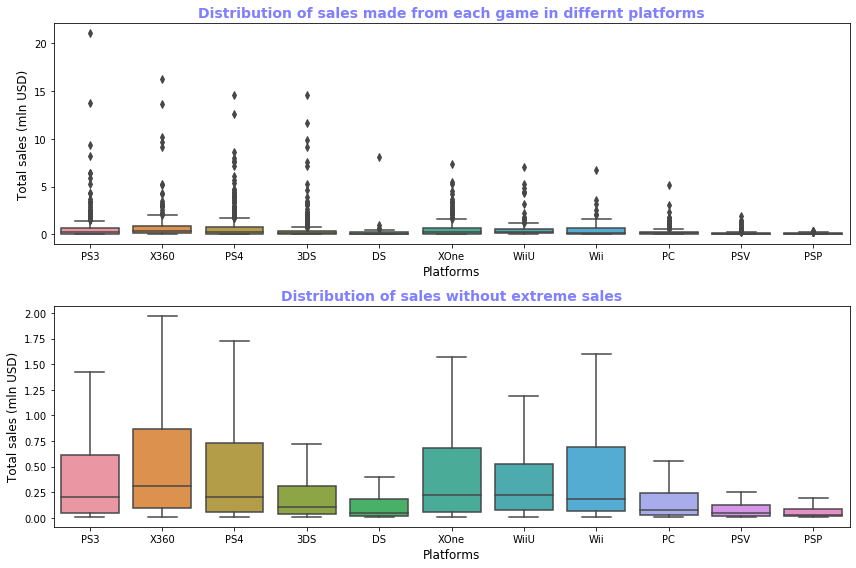

In [218]:
# create fig and ax object
fig, ax= plt.subplots(2, 1, figsize=(12, 8))

# a box plot showing sales of games for each platform
sns.boxplot(data=games_recent, x='platform', y='total_sales', ax=ax[0])

# same plot but without outliers
sns.boxplot(data=games_recent, x='platform', y='total_sales', showfliers = False, ax=ax[1])

#customize the subplots
ax[0].set_title('Distribution of sales made from each game in differnt platforms', fontsize=14, weight='bold', color='b', alpha=0.5)
ax[0].set_xlabel('Platforms', fontsize=12)
ax[0].set_ylabel('Total sales (mln USD)', fontsize=12)

ax[1].set_title('Distribution of sales without extreme sales', fontsize=14, weight='bold', color='b', alpha=0.5)
ax[1].set_xlabel('Platforms', fontsize=12)
ax[1].set_ylabel('Total sales (mln USD)', fontsize=12)

#show the plot
plt.tight_layout()
plt.show()

In [219]:
extremely_successful_games=games_recent[games_recent['total_sales']>2.5]
print('Out of {} games in recent 4 year, total sales of {} games were over 2.5 million USD!'\
      .format(len(games_recent), len(extremely_successful_games)))

Out of 2886 games in recent 4 year, total sales of 113 games were over 2.5 million USD!


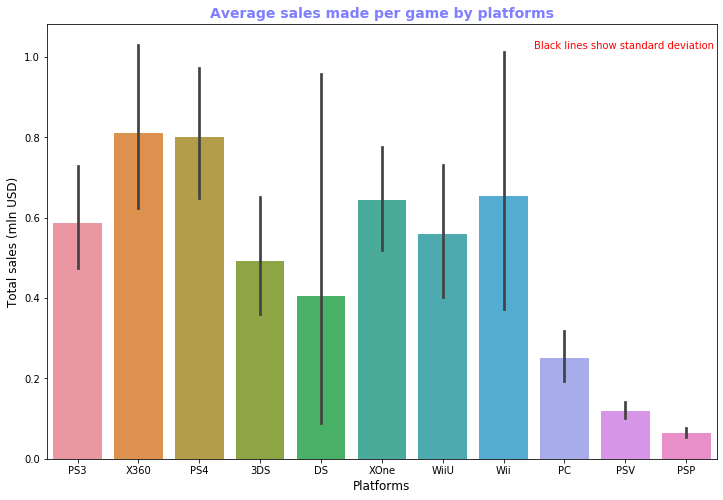

In [220]:
# bar chart for average sales made from each game across platforms
plt.figure(figsize=(12, 8))
sns.barplot(data=games_recent, x='platform', y='total_sales')
plt.ylabel('Average sales per game')

#customize the plot
plt.title('Average sales made per game by platforms', fontsize=14, weight='bold', color='b', alpha=0.5)
plt.xlabel('Platforms', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Total sales (mln USD)', fontsize=12)
plt.text(7.5,1.02, 'Black lines show standard deviation', fontsize=10, color='r')

#show the plot
plt.show()

> There are games with very high sales especially for PS3, X360, PS4, 3DS platforms. In addition, 106 of the 2384 games sold more than 2.5 million USD in the last 4 years. However, the median sales across platforms are more or less similar, especially for the PS3, X360, PS4, 3DS, and Xone. Unlike the median sales, when we analyze the average sales from each game across platforms, PS4, X360 and Xone stand out more.

### Effect of reviews
Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

**Based on previous observations, we have chosen PS4 for effect of reviews analysis.**

In [221]:
# get data only for PS4
ps4=games_recent[games_recent['platform']=='PS4']
ps4.shape

(392, 12)

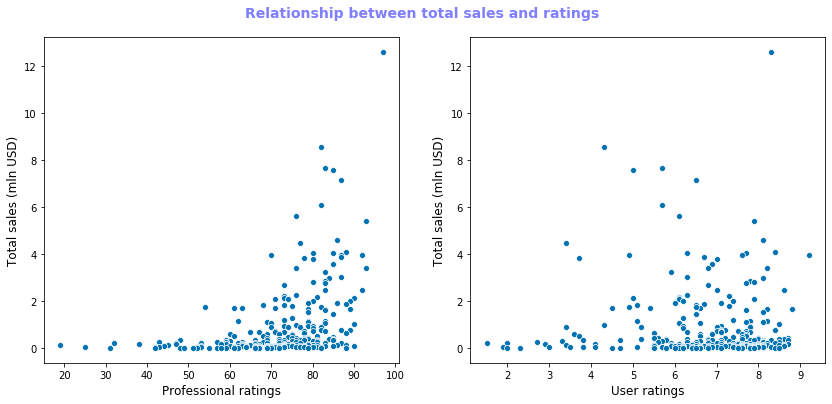

In [222]:
# create a figure with two axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# scatter plot for critic_score vs total_sales
sns.scatterplot(data=ps4, x='critic_score', y='total_sales', ax=ax[0])

#scatter plot for user_score vs total_sales
sns.scatterplot(data=ps4, x='user_score', y='total_sales', ax=ax[1])

#customize the subplots
fig.suptitle('Relationship between total sales and ratings', fontsize=14, weight='bold', color='b', alpha=0.5, y=0.95)
ax[0].set_xlabel('Professional ratings', fontsize=12)
ax[0].set_ylabel('Total sales (mln USD)', fontsize=12)

ax[1].set_xlabel('User ratings', fontsize=12)
ax[1].set_ylabel('Total sales (mln USD)', fontsize=12)

#show the plot
plt.show()

In [223]:
#correlation of critic, user scores and total sales
ps4[['total_sales','critic_score','user_score']]\
                    .corr().style.background_gradient(cmap='BrBG', axis=None).set_precision(2)

,total_sales,critic_score,user_score
total_sales,1,0.41,-0.032
critic_score,0.41,1,0.56
user_score,-0.032,0.56,1


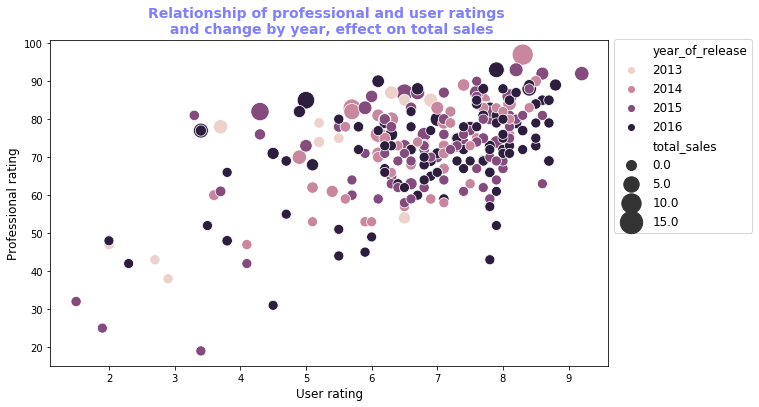

In [224]:
# a summary figure showing critic_score vs user_score, and its variation by year, total sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps4, x='user_score', y='critic_score', \
                hue='year_of_release', size='total_sales', sizes=(100,500))

#customize the plot
plt.title('Relationship of professional and user ratings \n and change by year, effect on total sales',\
          fontsize=14, weight='bold', color='b', alpha=0.5)
plt.xlabel('User rating', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Professional rating', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02), fontsize=12)
plt.show()

> There is a very small correlation between user score and total sales (0.024). But the correlation of professional rating (i.e. critic_score) and total sales are more pronounced (0.43). From the scatter plots, we can say that games that received a good rating from professionals are less likely to be bad in sales. However,  games that got a good point from professional usually gets a good point from users as well (correlation is 0.61). Moreover, games released in last years are getting a better rating from professionals and users.

### Same games on other platforms
Keeping your previous conclusions in mind and compare the sales of the same games on other platforms.

In [225]:
# sort total sales of games and select 3 games with highest sales
games_recent.sort_values('total_sales',ascending=False)['name'].head()

0            Grand Theft Auto V
1            Grand Theft Auto V
2     Call of Duty: Black Ops 3
3           Pokemon X/Pokemon Y
4    Call of Duty: Black Ops II
Name: name, dtype: object

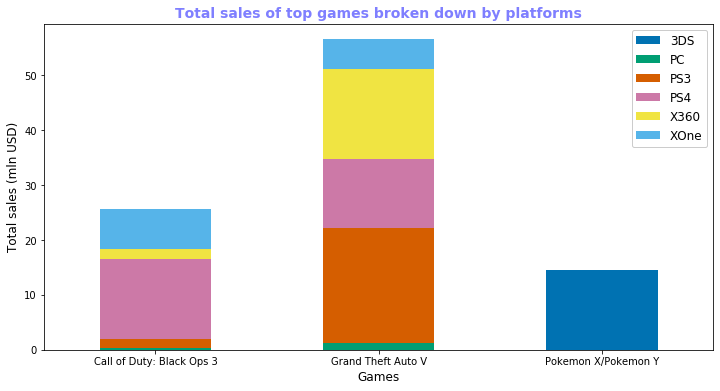

In [226]:
# make a new df using popular games:'Grand Theft Auto V','Call of Duty: Black Ops 3','Pokemon X/Pokemon Y'
#make a pivot table: games as index, columns containing sales across platforms
popular_games=games_recent[games_recent['name']\
                           .isin(['Grand Theft Auto V','Call of Duty: Black Ops 3','Pokemon X/Pokemon Y'])]\
                            .reset_index(drop=True)\
                            .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')\
                            .fillna(0)

# bar chart showing total sale of each game, broken down by platforms
popular_games.plot(kind='bar', stacked=True, figsize=(12, 6))

#customize the plot
plt.title('Total sales of top games broken down by platforms', fontsize=14, weight='bold', color='b', alpha=0.5)
plt.xlabel('Games', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Total sales (mln USD)', fontsize=12)
plt.legend(loc='upper right', frameon=True, framealpha=1, fontsize=12)

plt.show()

> **GTA V, CoD Black ops3 and Pokemon X/Y** were selected as popular games based on their total sales. Then we have analyzed their sales on different platforms. **GTA V** is one of the profitable games and although, it is played on different platforms (PS3, PS4, X360, XOne, and PC), its sales are more profound in PS3, PS4 and X360 platforms. On other hand, another popular game **Pokemon X/Y** is only played on Nintendo 3DS.

### Games by genre
Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [227]:
games_recent['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

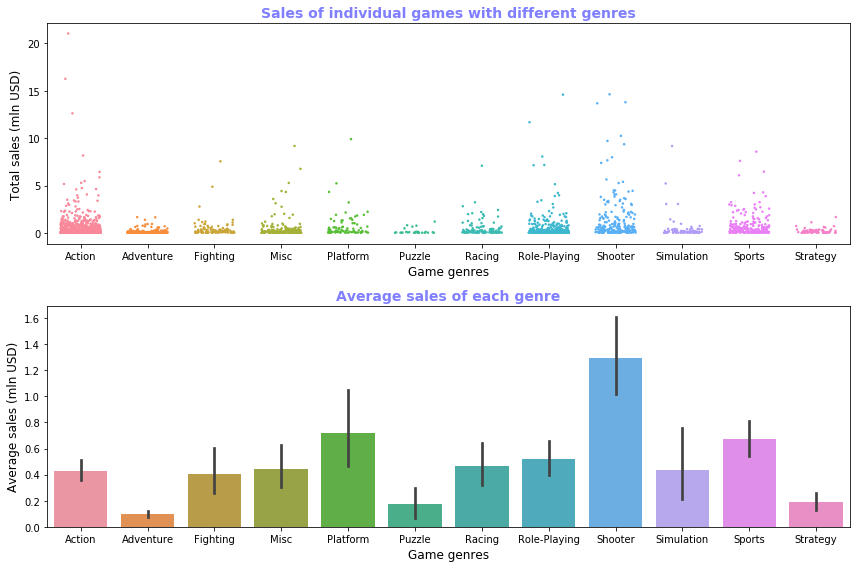

In [228]:
#create fig and ax objects
fig, ax= plt.subplots(2, 1, figsize=(12, 8))

# make a swarmplot, genre on x-axis and total_sales of games on y-axis
sns.stripplot(data=games_recent.sort_values('genre'), x='genre', y='total_sales', jitter=0.3, size=2.5, ax=ax[0])

# average sale per game in each genre
sns.barplot(data=games_recent.sort_values('genre'), x='genre', y='total_sales', ax=ax[1])

#customize the subplots
ax[0].set_title('Sales of individual games with different genres', fontsize=14, weight='bold', color='b', alpha=0.5)
ax[0].set_xlabel('Game genres', fontsize=12)
ax[0].set_ylabel('Total sales (mln USD)', fontsize=12)

ax[1].set_title('Average sales of each genre', fontsize=14, weight='bold', color='b', alpha=0.5)
ax[1].set_xlabel('Game genres', fontsize=12)
ax[1].set_ylabel('Average sales (mln USD)', fontsize=12)

# show plots
plt.tight_layout()
plt.show()

> More games with **action, shooter, role-playing and sports** genres have been released. When we visualize individual sales of each game, we have seen that the same genres are good at sales. However, average sales per game in each genre showed that **shooter** games are more promising than others. Genres with low sales were **adventure, puzzle and strategy**.

### Conclusion
Very few games were released before 1990. But then the number of games exponentially increased until 2008-2009 with the development of technology. At this peak times, around 1400 games were released yearly. Then the number of games decreased somehow and stabilized to ~600 games per year after 2011.

Total sales for each platform differentiate significantly. Some platforms have very few sales. However, some platforms made more than 700 mln USD in sales until 2016, such as PS, DS, Wii, PS3, X360 and PS2. We have chosen those platforms and analyzed in how many years they obtained such an amount of money. In general, it takes around 5 years for a new platform to shine, and again 5 years it takes to fade out. However, Nintendo DS is an exception for this.

From previous tasks, it has been observed that the number of the game published got stabilized after 2011 and from the description of the project we know that data for 2016 is not complete. Therefore, we have selected games that were released between 2011 and 2016.

In recent years, sales of PlayStation 3 and Xbox 360 were shrinking, while sales of their upgraded versions, i.e. PlayStation 4 and Xbox One, were expanding. While sales of PC, WiiU and 3DS did not change much, their sales are quite small compared to PS4 and Xone. **Hence for 2017, PlayStation 4 and Xbox One look more promising choice!**

There are games with very high sales especially for PS3, X360, PS4, 3DS platforms. In addition, 106 of the 2384 games sold more than 2.5 million USD in the last 4 years. However, the median sales across platforms are more or less similar, especially for the PS3, X360, PS4, 3DS, and Xone. Unlike the median sales, when we analyze the average sales per game across platforms, PS4, X360 and Xone stand out more. **Again it suggests PS4 or Xbox One.**

There is a very small correlation between user score and total sales (0.024). But the correlation of professional rating (i.e. critic_score) and total sales were more pronounced (0.43). From the scatter plots, we can say that **games that received a good rating from professionals are less likely to be bad in sales**.

"GTA V, CoD Black ops3 and Pokemon X/Y" were selected as popular games due to their high total sales. Then we have analyzed their sales on different platforms. "GTA V" is one of the profitable games and although, it is played on different platforms (PS3, PS4, X360, XOne, and PC), its sales are more profound in PS3, PS4 and X360 platforms. On other hand, another popular game "Pokemon X/Y" is only played on Nintendo 3DS.

More games with "action, shooter, role-playing and sports" genres have been released. When we visualize individual sales of each game, we have seen that the same genres are good at sales. However, average sales per game in each genre showed that "shooter" games are more promising than others. Genres with low sales were "adventure, puzzle and strategy". **Shooter genre is suggested**


## Create a user profile for each region
For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

### Top 5 platform
Determine the top five platforms and describe variations in their market shares from region to region.

In [229]:
# select data grouped by platform and sales from each region.
top_platform=games_recent.groupby('platform')['na_sales','eu_sales', 'jp_sales'].sum().T #transpose it to make wide table
top_platform.style.background_gradient(cmap='BrBG', axis=None) #beautify the table visualization

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
na_sales,55.31,4.59,19.12,103.38,108.74,0.13,10.98,17.45,38.1,140.05,93.12
eu_sales,42.64,3.53,37.76,106.86,141.09,0.42,11.36,11.92,25.13,74.52,51.59
jp_sales,87.79,3.72,0,35.29,15.96,10.47,21.04,3.39,13.01,1.57,0.34


In [230]:
# make a function that will be used in next three tasks to plot a pie charts
def top_salesby(data, bywhat):
    plt.style.use('seaborn-colorblind')
    fig, ax = plt.subplots(1, 3, figsize=(14, 6))
    regs=['na_sales', 'eu_sales', 'jp_sales']
    my_ax=[0,1,2]
    for i in range(3):
        # here the function will use provided df and get top platforms
        top_five=data.loc[regs[i]].sort_values(ascending=False).head(5).reset_index()
        #the rest would be summerized in a category of "others"
        rest= data.loc[regs[i]].sum()-top_five[regs[i]].sum()
        top_five.loc[5]=['others', rest]
        # pie chart
        ax[my_ax[i]].pie(top_five[regs[i]], labels=top_five[bywhat], autopct='%1.1f%%',shadow=True, startangle=90)
        # title generation
        title=regs[i].split('_sales')[0].upper()
        ax[my_ax[i]].set_title(title, fontsize=16, color='b', y=0.95)
    plt.show()

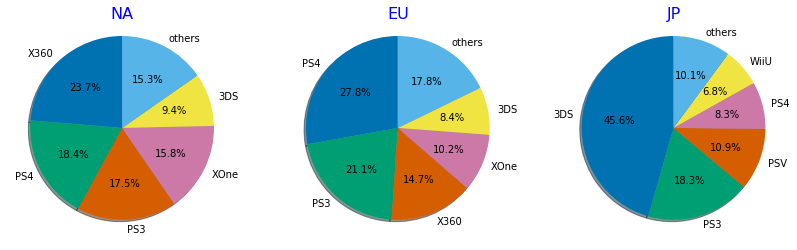

In [231]:
#apply the top_salesby function to generate pie chart of platforms for each region
top_salesby(top_platform, 'platform')

> In different regions, different platforms were popular. For example, while the X360 stood out in North America, PS3 or PS4 were more popular in Europe. Surprisingly, the Nintendo 3DS was much more popular than any other platform in Japan.

### Top 5 genres
Find the top five genres for each regions and explain the difference.

In [232]:
# select data grouped by genre and sales from each region.
top_genres=games_recent.groupby('genre')['na_sales','eu_sales', 'jp_sales'].sum().T
top_genres.style.background_gradient(cmap='BrBG', axis=None)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
na_sales,177.84,8.92,19.79,38.19,25.38,1.13,17.22,64,144.77,7.97,81.53,4.23
eu_sales,159.34,9.46,10.79,26.32,21.41,1.4,27.29,48.53,113.47,14.55,69.09,5.17
jp_sales,52.8,8.24,9.44,12.86,8.63,2.14,2.5,65.44,9.23,10.41,8.01,2.88


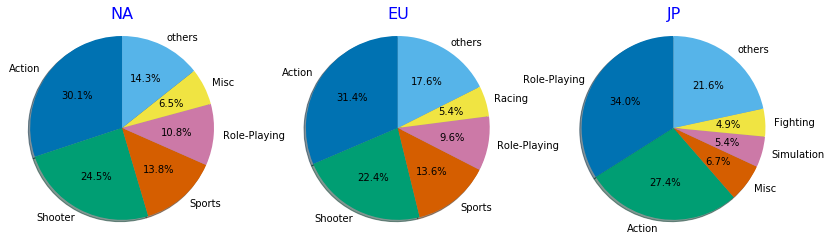

In [233]:
#apply the top_salesby function to generate pie chart of genres for each region
top_salesby(top_genres, 'genre')

> Similar to platforms, the popularity of various genres was different across regions. While the Action genre was the most famous genre in North America and Europe, it was the second popular in Japan. Interestingly, the Role-Playing genre was the most famous genre in Japan, while it is in 4th place in NA or EU. All these most likely be originated from cultural differences between regions.

### ESRB rating vs sales
Do ESRB ratings affect sales in individual regions?

In [234]:
# select data grouped by ESRb rating and sales from each region.
top_rating=games_recent.groupby('rating')['na_sales','eu_sales', 'jp_sales'].sum().T
top_rating.style.background_gradient(cmap='BrBG', axis=None)

rating,E,E10+,M,T,unknown
na_sales,114.37,75.7,231.57,66.02,103.31
eu_sales,113.03,55.37,193.96,52.96,91.5
jp_sales,28.33,8.19,21.2,26.02,108.84


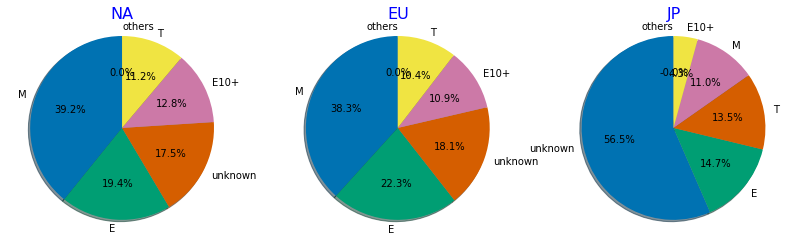

In [235]:
#apply the top_salesby function to generate pie chart of ESRB rating for each region
top_salesby(top_rating, 'rating')

> Games rated as M by ESRB are more popular than other games in North America and Europe, but it is less popular in Japan. Most of the games popular in Japan has not been rated in our Dataset, i.e. "unknown" rating.

### Conclusion
In different regions, different platforms were popular. For example, while the X360 stood out in North America, PS3 or PS4 were more popular in Europe. Surprisingly, the Nintendo 3DS was much more popular than any other platform in Japan.

Similar to platforms, the popularity of various genres was different across regions. While the Action genre was the most famous genre in North America and Europe, it was the second popular in Japan. Interestingly, the Role-Playing genre was the most famous genre in Japan, while it is in 4th place in NA or EU. All these most likely be originated from cultural differences between regions.

Games rated as M by ESRB are more popular than other games in North America and Europe, but it is less popular in Japan. Most of the games popular in Japan has not been rated in our Dataset, i.e. "unknown" rating.

## Test the following hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.Explain:
- How you formulated the null and alternative hypotheses
- What significance level you chose to test the hypotheses, and why

### User ratings of the Xbox One and PC
Average user ratings of the Xbox One and PC platforms are the same.

> ```Null hypothesis```: Average user rating for PC and Xbox One *are equal*!
```Alternative hypothesis```: Average user rating for PC and Xbox One *are not equal*!
We have chosen ```alpha as 0.05```, which will give us 95% confidence about our finding. This is a generally accepted value!

In [236]:
# get user_score values of each platform and get rid of NaN values
xone=games_recent[games_recent['platform']=='XOne']['user_score'].dropna()
pc=games_recent[games_recent['platform']=='PC']['user_score'].dropna()

alpha=0.05 #confidence level 95%

#test difference of mean of each plan
results = st.ttest_ind(xone, pc, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis!\nAn average user ratig of {}\u00B1{} for Xbox One is significantly \
different than average user rating of {}\u00B1{} for PC.'\
          .format(round(xone.mean(), 2), round(xone.std(), 2), round(pc.mean(), 2), round(pc.std(), 2)))
else:
    print('We fail to reject the null hypothesis!\nAn average user ratig of {}\u00B1{} for Xbox One is not significantly \
different than average user rating of {}\u00B1{} for PC.'\
          .format(round(xone.mean(), 2), round(xone.std(), 2), round(pc.mean(), 2), round(pc.std(), 2)))

p-value: 0.5489537965134912
We fail to reject the null hypothesis!
An average user ratig of 6.52±1.38 for Xbox One is not significantly different than average user rating of 6.43±1.66 for PC.


### User ratings for the Action and Sports
Average user ratings for the Action and Sports genres are different.

> ```Null hypothesis```: Average user rating for the Action genre and the Sports genre *are equal*!
```Alternative hypothesis```: Average user rating for the Action genre and the Sports genre *are not equal*!
We have chosen ```alpha as 0.05```, which will give us 95% confidence about our finding. This is a generally accepted value!

In [237]:
# get user_score values of each genre and get rid of NaN values
action=games_recent[games_recent['genre']=='Action']['user_score'].dropna()
sports=games_recent[games_recent['genre']=='Sports']['user_score'].dropna()

alpha=0.05 #confidence level 95%

#test difference of mean of each plan
results = st.ttest_ind(action, sports, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis!\nAn average user ratig of {}\u00B1{} for the action genre is significantly \
different than average user rating of {}\u00B1{} for the sports genre.'\
          .format(round(action.mean(), 2), round(action.std(), 2), round(sports.mean(), 2), round(sports.std(), 2)))
else:
    print('We fail to reject the null hypothesis!\nAn average user ratig of {}\u00B1{} for the action genre is not \
significantly different than average user rating of {}\u00B1{} for the sports genre.'\
          .format(round(action.mean(), 2), round(action.std(), 2), round(sports.mean(), 2), round(sports.std(), 2)))

p-value: 4.24307776572644e-20
We reject the null hypothesis!
An average user ratig of 6.83±1.37 for the action genre is significantly different than average user rating of 5.46±1.74 for the sports genre.


### Conclusion

Average user rating for PC and Xbox One was not significantly different. That means of them got around 6.5 rating from users.
An average user rating for the action and the sports genre were significantly different. That means, actions games usually get higher rating from users (6.8 vs 5.5)!

## General Conclusions
- All necessary Python packages and dataset has been successfully loaded. Data has **11 columns** and **16715 rows**.

**```Data Preprocessing```**

- All column names were converted to lowercase to easily deal with them in future. The missing values were observed in data. The most likely reason for missing values is that they were left blank during filling the table. This might be due to that the values were not released (e.g. ESRB rating, user/critic scores) or the person who filled the table could not reach the information (release year etc) at the time of filling the table. We  have dealt with missing values as follows:
    - Both **name and genre** columns have a similar number of missing values and they are only in 2 rows. We can drop these two rows.
    - Similarly, the **year_of_release** column has also missing values, which is only 1.6%. We will drop them as well!
    - The **critic_score and user_score** columns have a lot of missing values (51% and 40% respectively). Actually, we will fill them, for example with median values of each genre. But in that case, our results will be biased. Since we are not going to use machine learning algorithms in this project. Let's leave them as is, in order to avoid any bias!
    - The **rating** column also has a lot of missing values. We will fill them as "unknown".


- The data types of **year_of_release and user_score** columns were changed (float->datetime and object-> float, respectively). However, it was observed that the **user_score** column was containing "tbd" values. Since we don't know these values, they were treated as missing values, i.e. "tbd" converted to "NaN".

- A new column containing information about global sales is created by adding **na_sales, eu_sales, jp_sales and other_sales** columns. This column was named "total_sales".



**```Visualizations and Analysis```**

- Very few games were released before 1990. But then the number of games exponentially increased until 2008-2009 with the development of technology. At this peak times, around 1400 games were released yearly. Then the number of games decreased somehow and stabilized to ~600 games per year after 2011.

- Total sales for each platform differentiate significantly. Some platforms have very few sales. However, some platforms made more than 700 mln USD in sales until 2016, such as PS, DS, Wii, PS3, X360 and PS2. We have chosen those platforms and analyzed in how many years they obtained such an amount of money. In general, it takes around 5 years for a new platform to shine, and again 5 years it takes to fade out. However, Nintendo DS is an exception for this.

- From previous tasks, it has been observed that the number of the game published got stabilized after 2011 and from the description of the project we know that data for 2016 is not complete. Therefore, we have selected games that were released between 2011 and 2016.

- In recent years, sales of PlayStation 3 and Xbox 360 were shrinking, while sales of their upgraded versions, i.e. PlayStation 4 and Xbox One, were expanding. While sales of PC, WiiU and 3DS did not change much, their sales are quite small compared to PS4 and Xone. **Hence for 2017, PlayStation 4 and Xbox One look more promising choice!**

- There are games with very high sales especially for PS3, X360, PS4, 3DS platforms. In addition, 106 of the 2384 games sold more than 2.5 million USD in the last 4 years. However, the median sales across platforms are more or less similar, especially for the PS3, X360, PS4, 3DS, and Xone. Unlike the median sales, when we analyze the average sales per game across platforms, PS4, X360 and Xone stand out more. **Again it suggests PS4 or Xbox One.**

- There is a very small correlation between user score and total sales (0.024). But the correlation of professional rating (i.e. critic_score) and total sales were more pronounced (0.43). From the scatter plots, we can say that **games that received a good rating from professionals are less likely to be bad in sales**.

- "GTA V, CoD Black ops3 and Pokemon X/Y" were selected as popular games due to their high total sales. Then we have analyzed their sales on different platforms. "GTA V" is one of the profitable games and although, it is played on different platforms (PS3, PS4, X360, XOne, and PC), its sales are more profound in PS3, PS4 and X360 platforms. On other hand, another popular game "Pokemon X/Y" is only played on Nintendo 3DS.

- More games with "action, shooter, role-playing and sports" genres have been released. When we visualize individual sales of each game, we have seen that the same genres are good at sales. However, average sales per game in each genre showed that "shooter" games are more promising than others. Genres with low sales were "adventure, puzzle and strategy". **Shooter genre is suggested**

- In different regions, different platforms were popular. For example, while the **X360 stood out in North America, PS3 or PS4 were more popular in Europe. Surprisingly, the Nintendo 3DS was much more popular than any other platform in Japan.**

- Similar to platforms, the popularity of various genres was different across regions. While the **Action genre was the most famous genre in North America and Europe**, it was the second popular in Japan. Interestingly, the **Role-Playing genre was the most famous genre in Japan**, while it is in 4th place in NA or EU. All these most likely be originated from cultural differences between regions.

- Games rated as M by ESRB are more popular than other games in North America and Europe, but it is less popular in Japan. Most of the games popular in Japan has not been rated in our Dataset, i.e. "unknown" rating.



**```Testing```**

- **An average user rating for PC and Xbox One was not significantly different**. User usually rate these platforms equally (~6.5).
- **An average user rating for the action and the sports genre were significantly different**. That means, actions games usually get higher rating from users (6.8 vs 5.5)!